In [1]:
import omega500analysistools.IO.load_db as load_db
from omega500fitstools.IO.read_Omega500 import *
from scipy.stats.stats import pearsonr   
from scipy.stats import spearmanr
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pylab
from scipy import stats

In [2]:
import pandas as pd
import numpy as np
import sqlite3
# import matplotlib as mpl
# params = {
#    'axes.labelsize': 14,
#    'font.size': 12,
#    'legend.fontsize': 12,
#    'xtick.labelsize': 14,
#    'ytick.labelsize': 14,
#    'legend.frameon': False,
#    'text.usetex': False,
#    'figure.figsize': [6.5, 4.5]
#    }
# mpl.rcParams.update(params)
import matplotlib.pyplot as plt
plt.style.use('mypresentation')

from mergertree, get z0_parent_id, child_id, child_aexp, is_main_line 

from halos, according to the selection from mergertree (match aexp,id), get M_total_500c 

add another sheet super mergertree, with columns z0_parent_id, parent_aexp/id, child_aexp/id, parent/child M_total_500c

and plot aexp vs. M_total_500c

### load supermergertree and mergers info

In [3]:
smt=pd.read_csv('../data/SMT_NR.csv')
merger=pd.read_csv('../data/mergers.csv')

### load 3D gas ellipticity measurement
#### Lv?_r500c_ell_NR_gas.txt : cut substructures with f=3.5, measured with thin shell (0.9r, 1.1r) 
##### Lv8: 0.15,0.2,0.25,0.3 r500c
##### Lv7: 0.4, 0.5, 0.6 r500c
##### Lv6: 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3 r500c
thickshell_Lv8_r500c_ell_NR_gas.txt :  measured with thick shell (0.1r500c, 1.r) <br />
nocut_Lv8_r500c_ell_NR_gas.txt: no substructure cut  <br />
withcs_Lv8_r500c_ell_NR_gas.txt: move centroid

In [4]:
Lv8elldata=np.loadtxt('../data/Lv8_r500c_ell_NR_gas.txt')
Lv7elldata=np.loadtxt('../data/Lv7_r500c_ell_NR_gas.txt')
Lv6elldata=np.loadtxt('../data/Lv6_r500c_ell_NR_gas.txt')


thickLv8elldata=np.loadtxt('../data/thickshell_Lv8_r500c_ell_NR_gas.txt')
nocutLv8elldata=np.loadtxt('../data/nocut_Lv8_r500c_ell_NR_gas.txt')
csLv8elldata=np.loadtxt('../data/withcs_Lv8_r500c_ell_NR_gas.txt')

In [5]:
rlist=[0,0.15,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.,1.1,1.2,1.3]
print rlist

allelldata=np.concatenate((np.concatenate((Lv8elldata,Lv7elldata[:,1:]),axis=1),Lv6elldata[:,1:]),axis=1)
print np.shape(allelldata)

print allelldata[:,0]
# print len(ell_r500c),allz0id

[0, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
(85, 15)
[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   13.
   14.   15.   16.   17.   19.   21.   23.   25.   26.   27.   29.   31.
   32.   33.   34.   35.   39.   42.   44.   45.   49.   50.   53.   54.
   55.   59.   61.   63.   65.   66.   68.   69.   71.   73.   77.   78.
   79.   80.   81.   82.   83.   85.   86.   88.   91.   96.   98.  100.
  104.  106.  108.  125.  131.  132.  135.  140.  146.  149.  153.  156.
  161.  175.  200.  201.  217.  223.  229.  248.  284.  298.  434.  471.
  732.]


#### see the differences between different ellipticity measurement

In [6]:
# thick_ell_r500c=thickLv8elldata[:,ir]
# nocut_ell_r500c=nocutLv8elldata[:,ir]
# cs_ell_r500c=csLv8elldata[:,ir]


# plt.plot(thick_ell_r500c/ell_r500c)
# plt.title('ell ratio between thick shell vs. thin shell')
# plt.show()

# plt.plot(nocut_ell_r500c/ell_r500c)
# plt.title('ell ratio between nocut vs. cut')
# plt.show()

# plt.plot(cs_ell_r500c/ell_r500c)
# plt.title('ell ratio between cs vs. fixcenter')
# plt.show()

In [70]:
ir=6
print rlist[ir]
ell_r500c=allelldata[:,ir]


allz0id=allelldata[:,0]
groupbyz0id=smt.groupby('z0_parent_id')



0.5


#### Calculate Gamma over a specific time range

In [74]:
Gamma=[]    
acutGamma=0.5
ia=int(40-40*acutGamma)

for CLid in allz0id:
    group=groupbyz0id.get_group(CLid).iloc[0:25]
    nom=(np.log10(group['M_total_200m'].iloc[0])-np.log10(group['M_total_200m'].iloc[ia]))
    denom=(np.log10(group['aexp'].iloc[0])-np.log10(group['aexp'].iloc[ia]))
    Gamma.append(nom/denom)

a=group['aexp'].iloc[ia]
print 'check a(ia)', a


check a(ia) 0.5014


3
sample size: 12
14 14 14
sample size: 57
14 14 14
sample size: 16
14 14 14


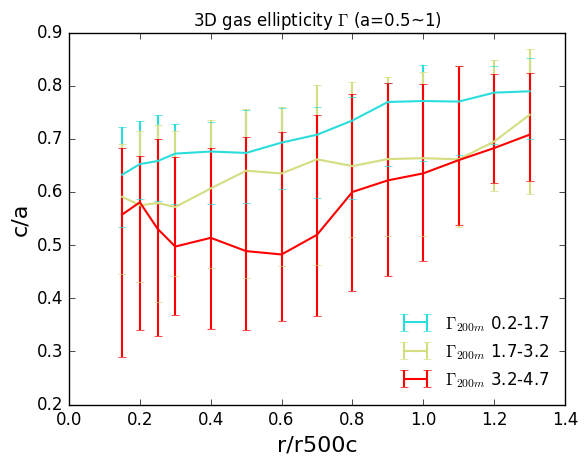

In [75]:
mask=[]
gammabins=np.arange(0.2,5,1.5)
for i in range(len(gammabins)-1):
    mask.append((Gamma<gammabins[i+1])&(Gamma>gammabins[i]))
print len(mask)

cnorm=colors.Normalize(vmin=0,vmax=len(mask))
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cm.rainbow)
for jm in range(len(mask)):
    med=[];up=[];down=[]
    print 'sample size:',np.sum(mask[jm])
    color=scalarmap.to_rgba(jm+1)
    for i in range(1,len(rlist)):
        tmpdata=allelldata[mask[jm]][:,i]
        ellmed=np.percentile(tmpdata[~np.isnan(tmpdata)],50)
        ellup=np.percentile(tmpdata[~np.isnan(tmpdata)],88)
        elldown=np.percentile(tmpdata[~np.isnan(tmpdata)],12)
        med.append(ellmed); up.append(ellup); down.append(elldown)
    med=np.array(med); up=np.array(up); down=np.array(down)
    print len(med),len(up),len(down)
    plt.errorbar(rlist[1:],med,yerr=[med-down,up-med],c=color,label=r'$\Gamma_{200m}$ '+str(gammabins[jm])+'-'+str(gammabins[jm+1]))
plt.legend()
plt.xlabel('r/r500c')
plt.ylabel('c/a')
plt.title(r'3D gas ellipticity $\Gamma$ (a='+str(np.around(a,decimals=2))+'~1)')
plt.savefig('figures/gamma_'+str(a)+'_3D_gas_ell_vs_r_r500c_errorbar.eps')

plt.show()

#### plot Gamma vs. c/a

(-0.34734094862447717, 0.0011261791258115386)
SpearmanrResult(correlation=-0.36322063709204616, pvalue=0.00063402897899979326)
-0.0690278588409 -0.636604283783


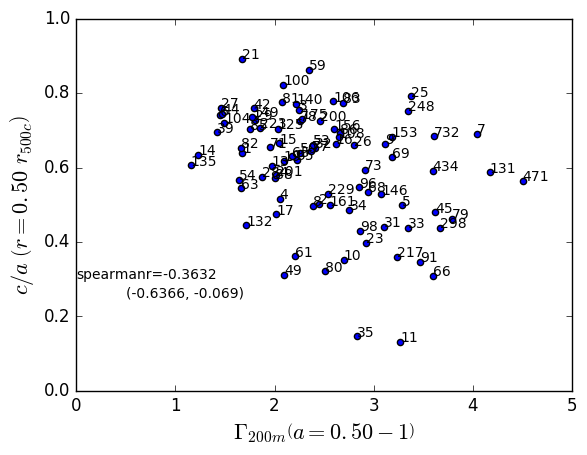

In [76]:
plt.scatter(Gamma,ell_r500c)
for i, txt in enumerate(allz0id):
    txt=str(int(txt))
    plt.annotate(txt, (Gamma[i],ell_r500c[i]))
# plt.ylim([0.2,1])
plt.xlim([0,max(Gamma)+0.5])
plt.xlabel(r'$\Gamma_{200m} \left(a=%.2f - 1\right)$'%np.around(a,decimals=2))
plt.ylabel(r'$c/a \ \left(r=%.2f  \ r_{500c}\right)$'%rlist[ir])
plt.annotate('spearmanr='+str(np.around(spearmanr(Gamma,ell_r500c)[0],4)),(0,0.3))



print pearsonr(Gamma,ell_r500c)
print spearmanr(Gamma,ell_r500c)


tmpspearmanr=[]
for j in range(500):
    index=np.random.choice(len(allz0id),len(allz0id)-10)
    subsampleGamma=[Gamma[i] for i in index]
    subsampleell=[ell_r500c[i] for i in index]
    # print 'quiet Gamma~ell pearson',pearsonr(subsampleGamma,subsampleell)
    tmpspearmanr.append(spearmanr(subsampleGamma,subsampleell)[0])
print max(tmpspearmanr),min(tmpspearmanr)
plt.annotate('('+str(np.around(min(tmpspearmanr),4))+', '+str(np.around(max(tmpspearmanr),4))+')',(0.5,0.25))

# plt.savefig('Gamma_a='+str(acutGamma)+'vs_ell_'+str(rlist[ir])+'r500c.png')
plt.savefig('Gamma_'+str(acutGamma)+'r'+str(rlist[ir])+'.eps')

plt.show()


# plt.hist(Gamma,bins=20)
# plt.show()

In [77]:
1./0.6-1

0.6666666666666667

67 [1.0, 2.0, 3.0, 132.0, 5.0, 6.0, 135.0, 9.0, 140.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 21.0, 201.0, 23.0, 25.0, 26.0, 27.0, 156.0, 29.0, 31.0, 32.0, 33.0, 35.0, 39.0, 284.0, 42.0, 44.0, 45.0, 175.0, 49.0, 50.0, 53.0, 54.0, 55.0, 59.0, 63.0, 65.0, 68.0, 69.0, 71.0, 73.0, 77.0, 78.0, 79.0, 81.0, 82.0, 83.0, 85.0, 86.0, 471.0, 88.0, 732.0, 223.0, 96.0, 98.0, 131.0, 229.0, 104.0, 106.0, 108.0, 248.0, 125.0, 149.0]
-0.0310251592503 -0.76779249347


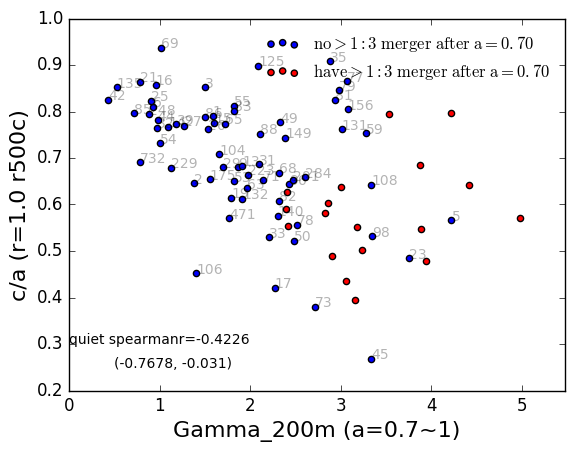

all Gamma~ell pearson (-0.45179435714785321, 1.4233045668664597e-05)
all Gamma~ell  SpearmanrResult(correlation=-0.48274379519249561, pvalue=2.8836567567762204e-06)
quiet Gamma~ell pearson (-0.42133108766092797, 0.00038424994095443484)
quiet Gamma~ell  SpearmanrResult(correlation=-0.42257961529252136, pvalue=0.0003676218507892799)


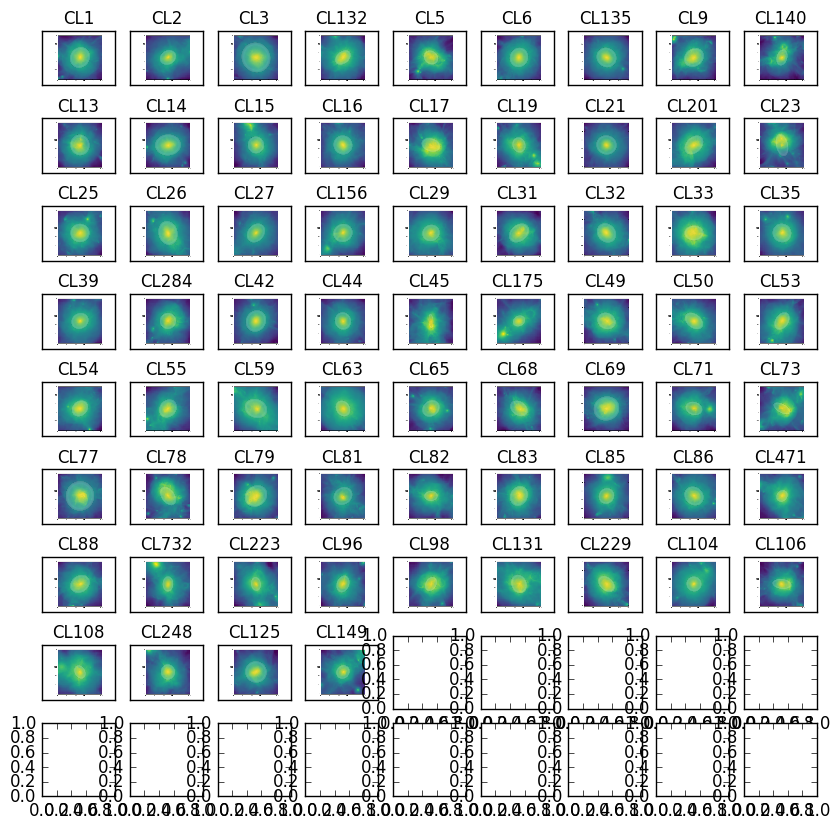

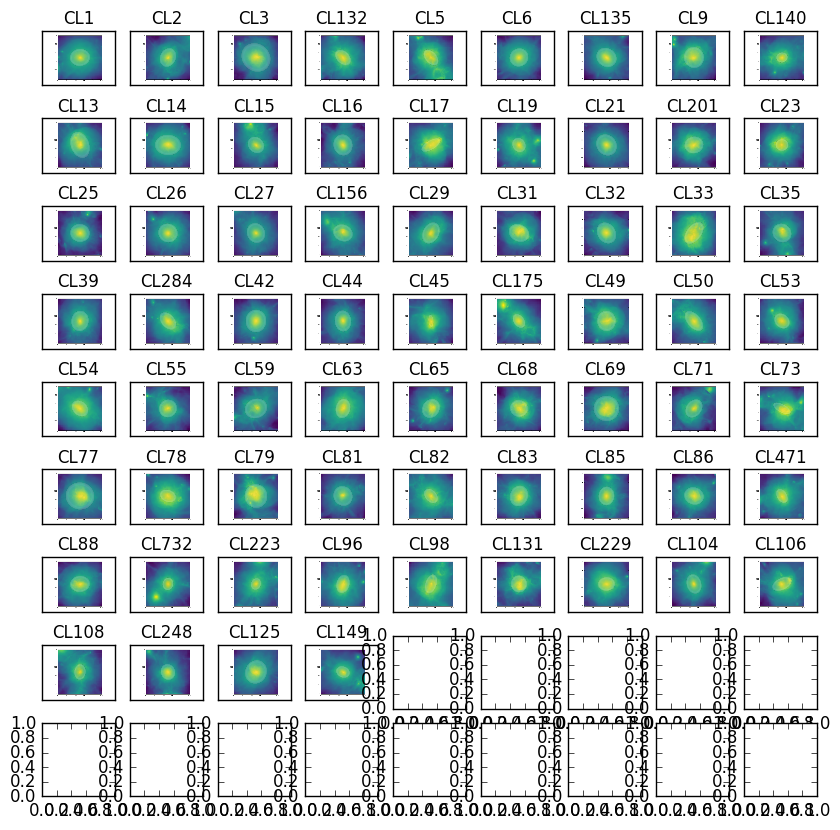

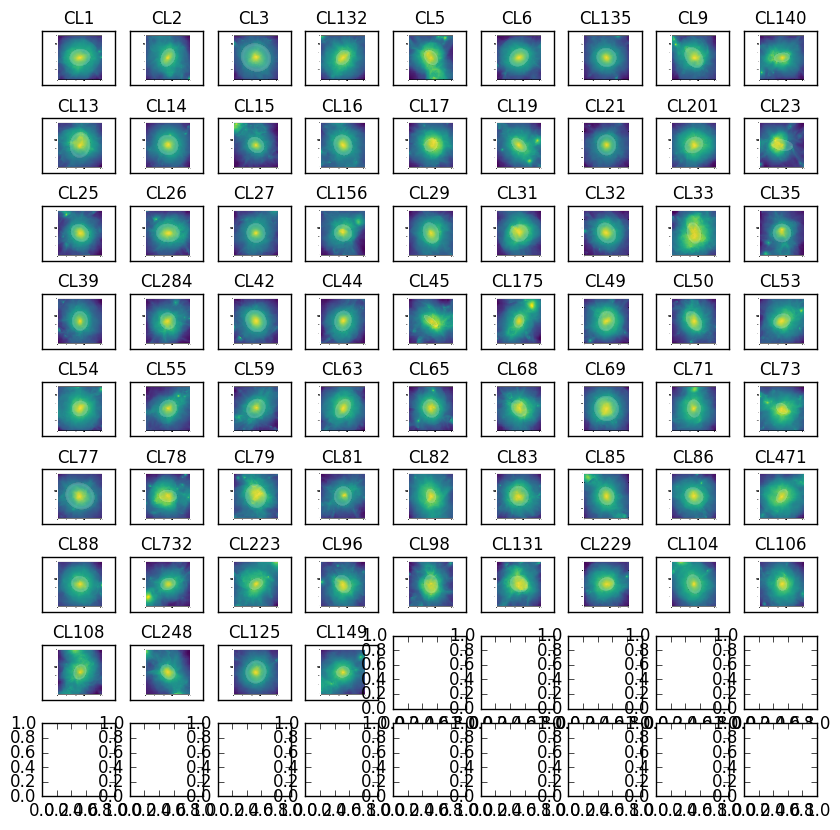

In [68]:
acutmerger=0.7#acutGamma
mr=3 #merger mass ratio
selectid=merger['z0_parent_id'][~(merger['1:'+str(mr)+' after a='+str(acutmerger)])]#(~merger['1:5 after a=0.7'])&
selectid=list(set(selectid))
print len(selectid),selectid

from scipy import misc
import glob
import matplotlib.image as mpimg

quietGamma=[]
quietell=[]
vioGamma=[]
vioell=[]
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        quietGamma.append(Gamma[i])
        quietell.append(ell_r500c[i])
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],ell_r500c[i]),alpha=0.3)
    else:
        vioGamma.append(Gamma[i])
        vioell.append(ell_r500c[i])
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],ell_r500c[i]),alpha=0.0)
    
plt.ylim([0.2,1])
plt.xlim([0,max(Gamma)+0.5])
plt.scatter(quietGamma,quietell,c='blue',label=r'$\rm no >1:%d \ merger \ after \ a=%.2f$'%(mr,acutmerger))
plt.scatter(vioGamma,vioell,c='red',label=r'$\rm have >1:%d \ merger \ after \ a=%.2f$'%(mr,acutmerger))
plt.xlabel('Gamma_200m (a='+str(np.around(a,decimals=2))+'~1)')
plt.ylabel('c/a (r='+str(rlist[ir])+' r500c)')
plt.legend()


tmpspearmanr=[]
for j in range(500):
    index=np.random.choice(len(selectid),len(selectid)-3)
    subsampleGamma=[quietGamma[i] for i in index]
    subsampleell=[quietell[i] for i in index]
    tmpspearmanr.append(spearmanr(subsampleGamma,subsampleell)[0])
print max(tmpspearmanr),min(tmpspearmanr)
plt.annotate('quiet spearmanr='+str(np.around(spearmanr(quietGamma,quietell)[0],4)),(0,0.3))
plt.annotate('('+str(np.around(min(tmpspearmanr),4))+', '+str(np.around(max(tmpspearmanr),4))+')',(0.5,0.25))

# plt.savefig('quiet_'+str(mr)+'_Gamma_a='+str(acutGamma)+'vs_ell_'+str(rlist[ir])+'r500c.png')
plt.savefig('tmp.eps')
plt.show()
print 'all Gamma~ell pearson',pearsonr(Gamma,ell_r500c)
print 'all Gamma~ell ',spearmanr(Gamma,ell_r500c)
print 'quiet Gamma~ell pearson',pearsonr(quietGamma,quietell)
print 'quiet Gamma~ell ',spearmanr(quietGamma,quietell)





nimg=9
fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))
for i,ids in enumerate(selectid):
    ids=int(ids)
    img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_'+str(rlist[ir])+'r500c_ell3D_0.png')
    
    axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
    axarr[i/nimg,i%nimg].imshow(img)
    axarr[i/nimg,i%nimg].set_xticks([])
    axarr[i/nimg,i%nimg].set_yticks([])

plt.show()
fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))
for i,ids in enumerate(selectid):
    ids=int(ids)
    img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_'+str(rlist[ir])+'r500c_ell3D_1.png')
    
    axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
    axarr[i/nimg,i%nimg].imshow(img)
    axarr[i/nimg,i%nimg].set_xticks([])
    axarr[i/nimg,i%nimg].set_yticks([])
plt.show()
fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))
for i,ids in enumerate(selectid):
    ids=int(ids)
    img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_'+str(rlist[ir])+'r500c_ell3D_2.png')
    
    axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
    axarr[i/nimg,i%nimg].imshow(img)
    axarr[i/nimg,i%nimg].set_xticks([])
    axarr[i/nimg,i%nimg].set_yticks([])
plt.show()


15 0


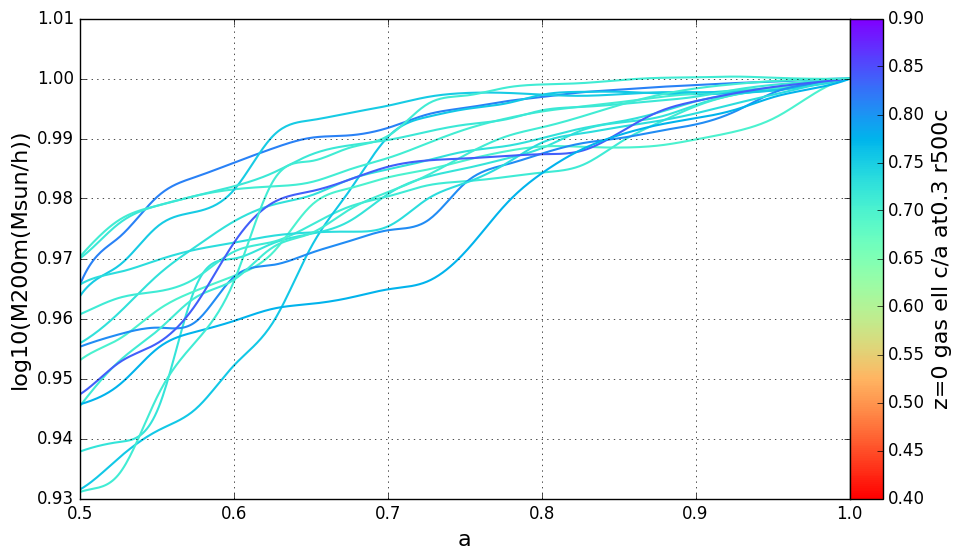

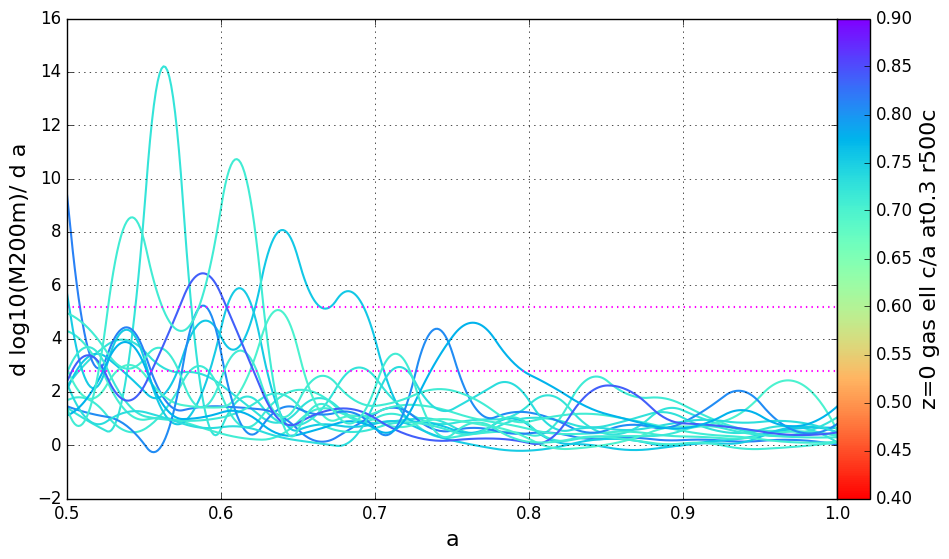

In [13]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from scipy.interpolate import CubicSpline as spl
from scipy import interpolate
cnorm=colors.Normalize(vmin=0.4,vmax=.9)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(11, 6))
fig2=plt.figure(figsize=(11, 6))

ax = fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax2=fig2.add_axes([0.1, 0.1, 0.7, 0.8])

aexp_sample=np.linspace(0.5,1,400)

count=0
subcnt=0

similargamma=[]

for CLid in selectid:
    
    tmpdata=groupbyz0id.get_group(CLid).iloc[0:25]
    i=np.where(allz0id==CLid)[0][0]
    ell=ell_r500c[i]
    roundthresh=0.7
    if ell>roundthresh:
        count+=1
        color=scalarmap.to_rgba(ell)
        M0= tmpdata['M_total_200m'].iloc[0]
        Mtot=tmpdata['M_total_200m'].as_matrix()
        ae=tmpdata['aexp'].as_matrix()
        spline=spl(ae[::-1],np.log10(Mtot)[::-1])
        deriv=spline.derivative()
#         similargamma.append(spline(aexp_sample[-1])-spline(aexp_sample[40]))
        ax.plot(aexp_sample,spline(aexp_sample)/np.log10(M0),c=color)
        ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
#         if (deriv(aexp_sample)[40:]<2).all():
#             subcnt+=1
#             ax.plot(aexp_sample,spline(aexp_sample),c=color)
#             ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
#             print CLid,spline(aexp_sample[-1])-spline(aexp_sample[0])
#             if ell<0.7:
#                 print 'aah',CLid

onethird=np.log10(4./3.)/(ae[0]-ae[1])
ax2.plot(aexp_sample,np.ones_like(aexp_sample)*onethird,c='magenta',ls=':')



onesixth=np.log10(7./6.)/(ae[0]-ae[1])
ax2.plot(aexp_sample,np.ones_like(aexp_sample)*onesixth,c='magenta',ls=':')

print count,subcnt
ax.set_xlabel('a')
ax.set_ylabel('log10(M200m(Msun/h))')


colorbar_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])

colorbar_ax2 = fig2.add_axes([0.8, 0.1, 0.03, 0.8])


ax2.set_ylim([-2,16])
ax2.set_xlabel('a')
ax2.set_ylabel('d log10(M200m)/ d a')


ax.grid(True)
ax.set_xlim([0.5,1])


ax2.grid(True)
ax2.set_xlim([0.5,1])

matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
matplotlib.colorbar.ColorbarBase(colorbar_ax2 ,cmap=cmap, norm=cnorm)

colorbar_ax.set_ylabel('z=0 gas ell c/a at'+str(rlist[ir])+' r500c')
colorbar_ax2.set_ylabel('z=0 gas ell c/a at'+str(rlist[ir])+' r500c')


fig.savefig(str(rlist[ir])+'_r500c_'+'round_MAH.png')
fig2.savefig(str(rlist[ir])+'_r500c_'+'round_MAH_deriv.png')

plt.show()

#### Plot scaling relation

In [14]:
#### load big database
database = '/Users/hqchen/filacf/Omega500/databases/L500_NR_0.db'

df=load_db.return_table(database)
df['halos'].columns

Mtot500c=df['halos']['M_total_500c'][df['halos']['aexp']>1].as_matrix()
Mgas500c=df['halos']['M_gas_500c'][df['halos']['aexp']>1].as_matrix()



In [15]:
obsfile= '/Users/hqchen/filacf/Omega500/databases/NR_mass_observables_a1.0005.txt'
ids,r500c,M500c,Lx,Tx,Mgas,Yx=np.loadtxt(obsfile,unpack=True)

In [78]:
# plt.scatter(M500c,Yx)
# plt.xlabel('M500c Msun/h')
# plt.ylabel('Yx keV Msun/h')
# plt.xlim([min(M500c),max(M500c)])
# plt.ylim([min(Yx),max(Yx)])
# plt.loglog()
# plt.show()

# plt.scatter(M500c,Lx)
# plt.xlabel('M500c Msun/h')
# plt.ylabel('Lx erg/s')
# plt.xlim([min(M500c),max(M500c)])
# plt.ylim([min(Lx),max(Lx)])
# plt.loglog()
# plt.show()

# plt.scatter(M500c,Tx)
# plt.xlabel('M500c Msun/h')
# plt.ylabel('Tx keV')
# plt.xlim([min(M500c),max(M500c)])
# plt.ylim([min(Tx),max(Tx)])
# plt.loglog()
# plt.show()

# plt.scatter(M500c,Mgas)
# plt.xlabel('M500c Msun/h')
# plt.ylabel('Mgas Msun/h')
# plt.xlim([min(M500c),max(M500c)])
# plt.ylim([min(Mgas),max(Mgas)])
# plt.loglog()
# plt.show()

$$M_{gas}\propto M$$
$$T\propto \Delta^{1/3}M^{2/3}$$
$$L_{bol}\propto \Delta^{7/6}M^{4/3}$$
$$L_{T>2keV}\propto \Delta M$$
$$Y\propto \Delta^{1/3} M^{5/3}$$
### fix slope or not?



1.088829651 28.7146173725 0.892066861739 2.28129857582e-30 0.0605437236897
[1.0, 2.0, 3.0, 132.0, 5.0, 6.0, 135.0, 9.0, 140.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 21.0, 201.0, 23.0, 25.0, 26.0, 27.0, 156.0, 29.0, 31.0, 32.0, 33.0, 35.0, 39.0, 284.0, 42.0, 44.0, 45.0, 175.0, 49.0, 50.0, 53.0, 54.0, 55.0, 59.0, 63.0, 65.0, 68.0, 69.0, 71.0, 73.0, 77.0, 78.0, 79.0, 81.0, 82.0, 83.0, 85.0, 86.0, 471.0, 88.0, 732.0, 223.0, 96.0, 98.0, 131.0, 229.0, 104.0, 106.0, 108.0, 248.0, 125.0, 149.0]


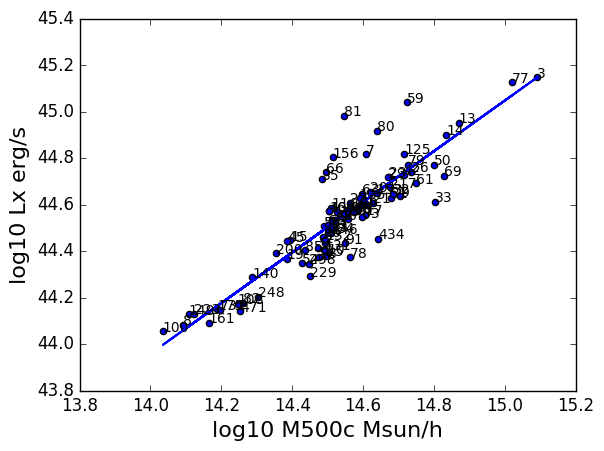

0.636992233041 -8.638868748 0.886316114916 1.74431773864e-29 0.0365311325055


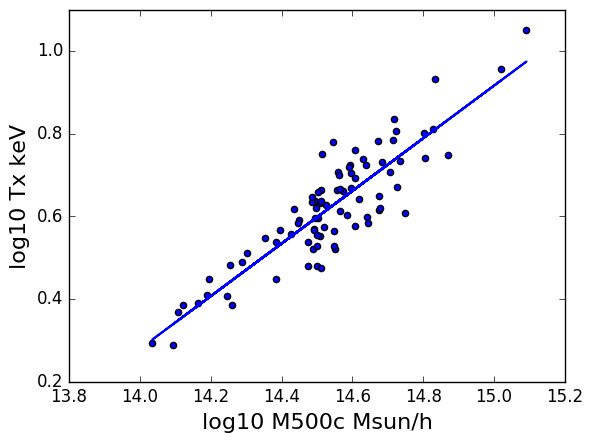

1.63834674479 -9.43209185625 0.976838257154 2.3541487991e-57 0.0393926595504


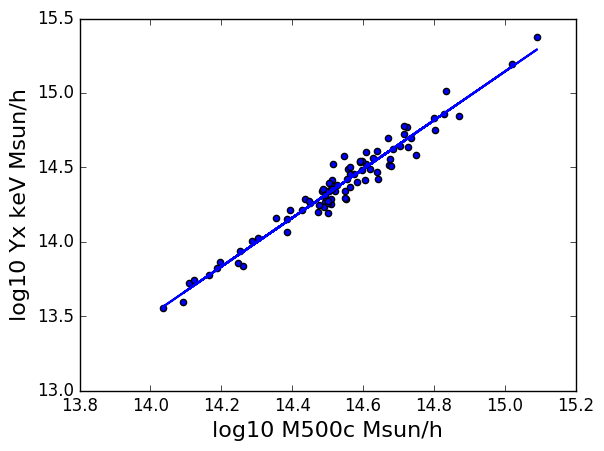

In [79]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot500c),np.log10(Lx))
line = slope*np.log10(Mtot500c)+intercept
print slope,intercept, r_value, p_value, std_err


plt.scatter(np.log10(Mtot500c),np.log10(Lx))
print selectid
for i, txt in enumerate(allz0id):
    txt=str(int(txt))
    plt.annotate(txt, (np.log10(Mtot500c)[i],np.log10(Lx)[i]))
plt.plot(np.log10(Mtot500c), line)
plt.xlabel('log10 M500c Msun/h')
plt.ylabel('log10 Lx erg/s')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot500c),np.log10(Tx))
line = slope*np.log10(Mtot500c)+intercept
print slope,intercept, r_value, p_value, std_err

plt.scatter(np.log10(Mtot500c),np.log10(Tx))
plt.plot(np.log10(Mtot500c), line)
plt.xlabel('log10 M500c Msun/h')
plt.ylabel('log10 Tx keV')
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot500c),np.log10(Yx))
line = slope*np.log10(Mtot500c)+intercept
print slope,intercept, r_value, p_value, std_err

plt.scatter(np.log10(Mtot500c),np.log10(Yx))
plt.plot(np.log10(Mtot500c), line)
plt.xlabel('log10 M500c Msun/h')
plt.ylabel('log10 Yx keV Msun/h')
plt.show()



0.99670372545 2.53208765188e-92 0.00897192111171


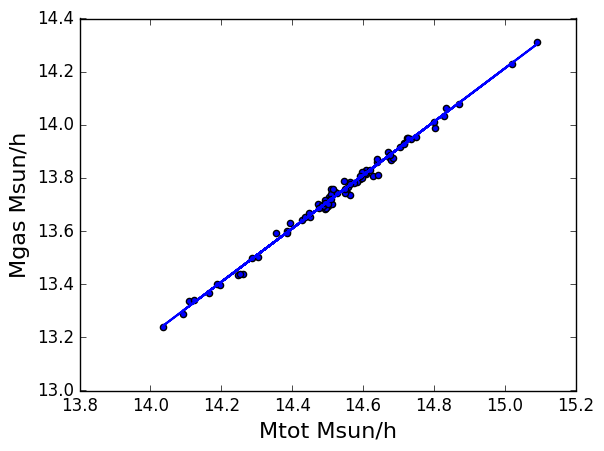

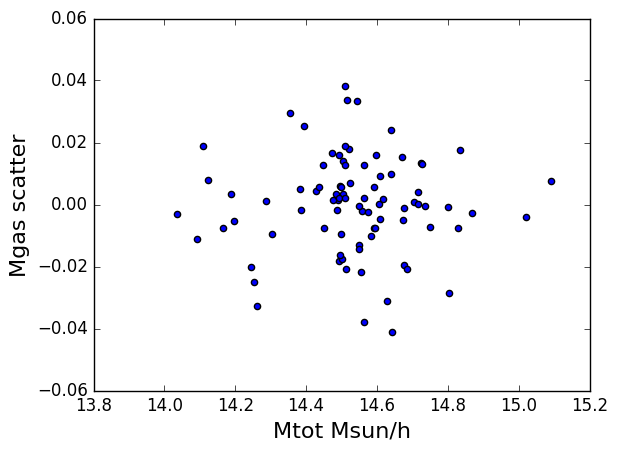

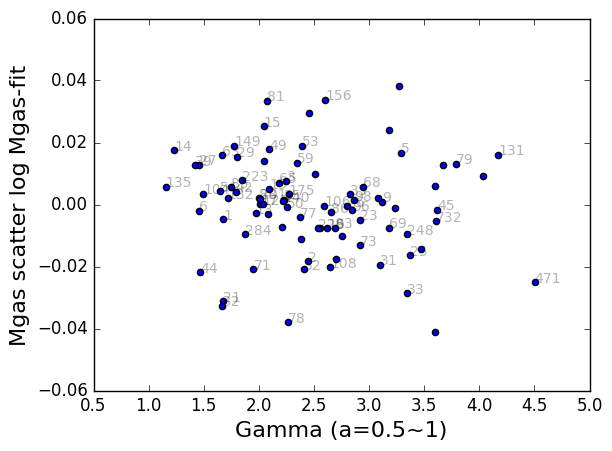

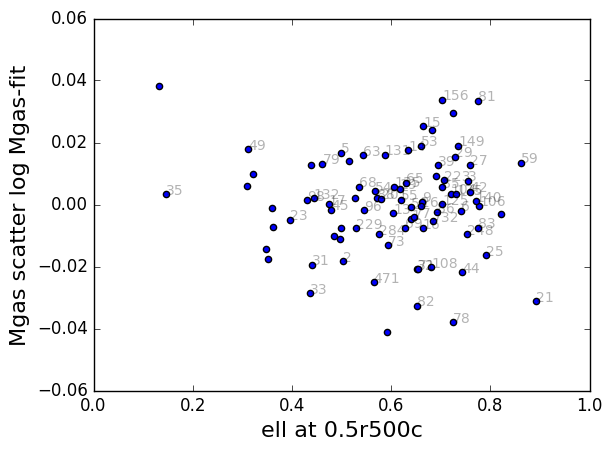

In [80]:
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot500c),np.log10(Mgas500c))
line = slope*np.log10(Mtot500c)+intercept
print r_value,p_value,std_err
plt.xlabel('Mtot Msun/h')
plt.ylabel('Mgas Msun/h')
plt.scatter(np.log10(Mtot500c),np.log10(Mgas500c))
plt.plot(np.log10(Mtot500c), line)
plt.show()

plt.scatter(np.log10(Mtot500c),(np.log10(Mgas500c)-line))

plt.xlabel('Mtot Msun/h')
plt.ylabel('Mgas scatter')
plt.show()

Gamma=np.array(Gamma)

plt.scatter(Gamma,(np.log10(Mgas500c)-line))
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],(np.log10(Mgas500c)-line)[i]),alpha=0.3)
plt.xlabel('ell at '+str(rlist[ir])+'r500c')
plt.xlabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')
plt.ylabel('Mgas scatter log Mgas-fit')
plt.savefig('Mgas_scatter_gamma.png')
plt.show()

plt.scatter(ell_r500c,np.log10(Mgas500c)-line)
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (ell_r500c[i],(np.log10(Mgas500c)-line)[i]),alpha=0.3)
plt.xlabel('ell at '+str(rlist[ir])+'r500c')
plt.ylabel('Mgas scatter log Mgas-fit')
plt.savefig('Mgas_scatter_'+str(rlist[ir])+'r500c.png')
plt.show()

slope fit 1.088829651
0.892066861739 2.28129857582e-30 0.0605437236897


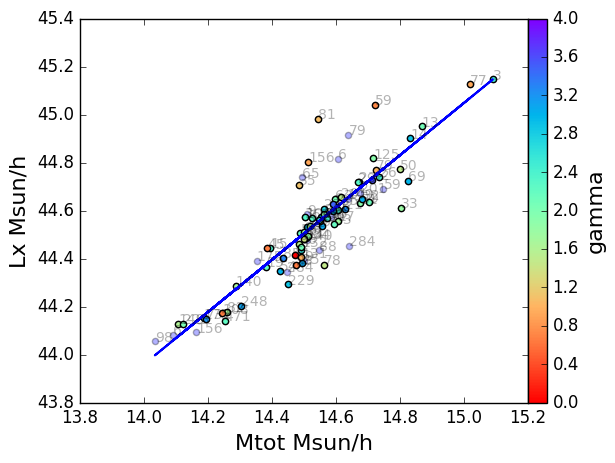

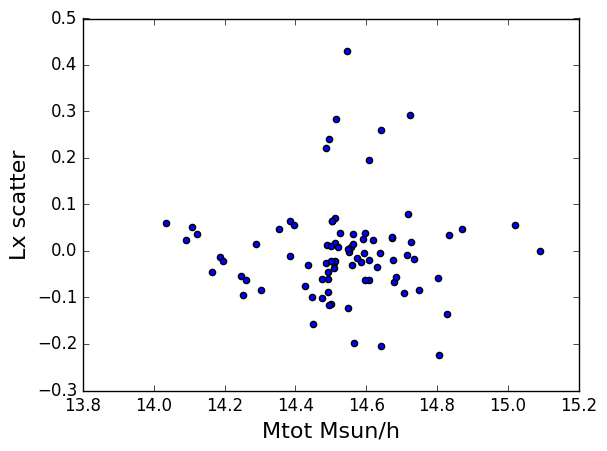

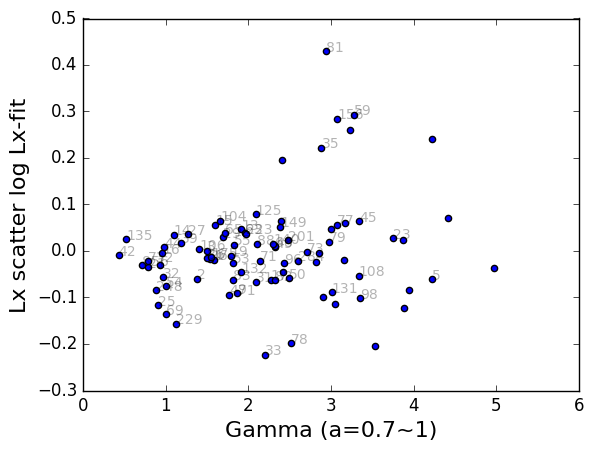

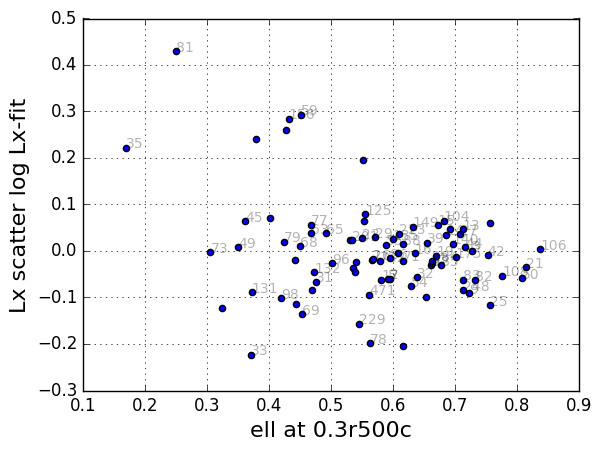

In [78]:
# Generated linear fit
import matplotlib

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot500c),np.log10(Lx))
line = slope*np.log10(Mtot500c)+intercept
print 'slope fit',slope
print r_value,p_value,std_err
# cnorm=colors.Normalize(vmin=0.4,vmax=.9)
# cmap=cm.rainbow_r
# scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
# fig=plt.figure()
# fig.add_axes([0.1, 0.1, 0.7, 0.8])
# plt.xlabel('Mtot Msun/h')
# plt.ylabel('Lx Msun/h')
# plt.scatter(np.log10(Mtot500c),np.log10(Lx),alpha=0.3)
# plt.plot(np.log10(Mtot500c), line)


# for ids in allz0id:
#     i=np.where(allz0id==ids)[0][0]
#     if ids in selectid:
#         color=scalarmap.to_rgba(ell_r500c[i])
#         txt=str(int(allz0id[i]))
#         plt.scatter(np.log10(Mtot500c[i]),np.log10(Lx[i]),c=color)
#     plt.annotate(txt, (np.log10(Mtot500c)[i],np.log10(Lx)[i]),alpha=0.3)
# colorb_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])
# matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnorm)
# colorb_ax.set_ylabel('z=0 gas ell c/a at'+str(rlist[ir])+' r500c')
# plt.savefig('Lx_Mtot.eps')
# plt.show()



###########
fig=plt.figure()
fig.add_axes([0.1, 0.1, 0.7, 0.8])
cnormgamma=colors.Normalize(vmin=0,vmax=4)
scalarmapgamma=cm.ScalarMappable(norm=cnormgamma,cmap=cm.rainbow)

plt.xlabel('Mtot Msun/h')
plt.ylabel('Lx Msun/h')
plt.scatter(np.log10(Mtot500c),np.log10(Lx),alpha=0.3)
plt.plot(np.log10(Mtot500c), line)


for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        color=scalarmapgamma.to_rgba(Gamma[i])
        txt=str(int(allz0id[i]))
        plt.scatter(np.log10(Mtot500c[i]),np.log10(Lx[i]),c=color)
    plt.annotate(txt, (np.log10(Mtot500c)[i],np.log10(Lx)[i]),alpha=0.3)
colorb_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnormgamma)
colorb_ax.set_ylabel('gamma')
# plt.savefig('Lx_Mtot.eps')
plt.show()
#------------------------






plt.scatter(np.log10(Mtot500c),(np.log10(Lx)-line))

plt.xlabel('Mtot Msun/h')
plt.ylabel('Lx scatter')
plt.savefig('tmp.eps')
plt.show()

Gamma=np.array(Gamma)

plt.scatter(Gamma,(np.log10(Lx)-line))
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],(np.log10(Lx)-line)[i]),alpha=0.3)
plt.xlabel('ell at '+str(rlist[ir])+'r500c')
plt.xlabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')
plt.ylabel('Lx scatter log Lx-fit')
plt.savefig('Lx_scatter_gamma.eps')
plt.show()

plt.scatter(ell_r500c,np.log10(Lx)-line)
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (ell_r500c[i],(np.log10(Lx)-line)[i]),alpha=0.3)
plt.xlabel('ell at '+str(rlist[ir])+'r500c')
plt.ylabel('Lx scatter log Lx-fit')
plt.grid()
plt.savefig('Lx_scatter_'+str(rlist[ir])+'r500c.png')

plt.show()

0.886316114916 1.74431773864e-29 0.0365311325055


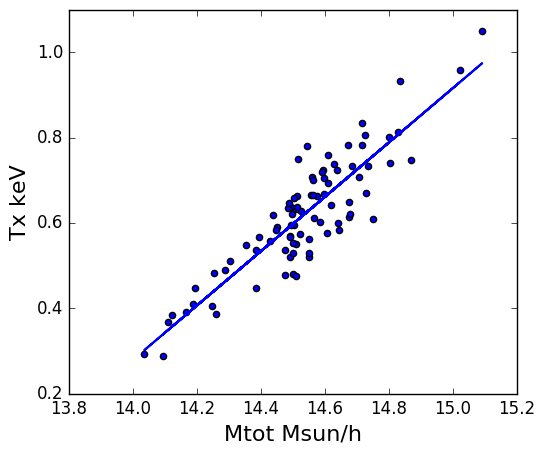

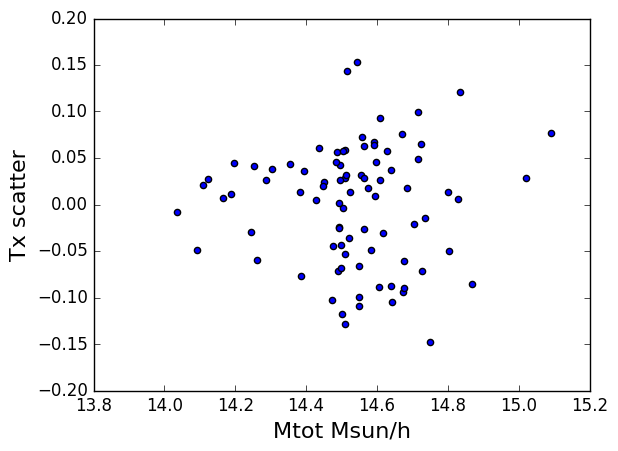

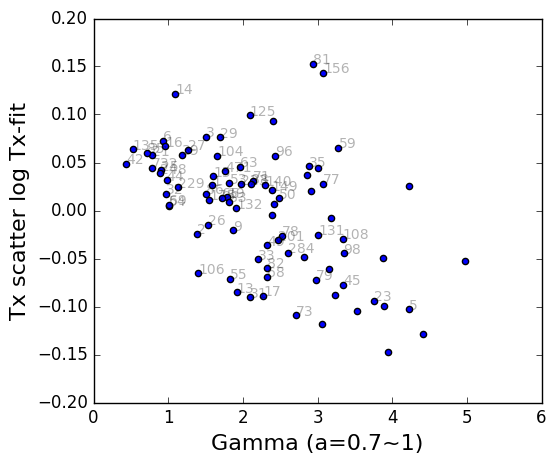

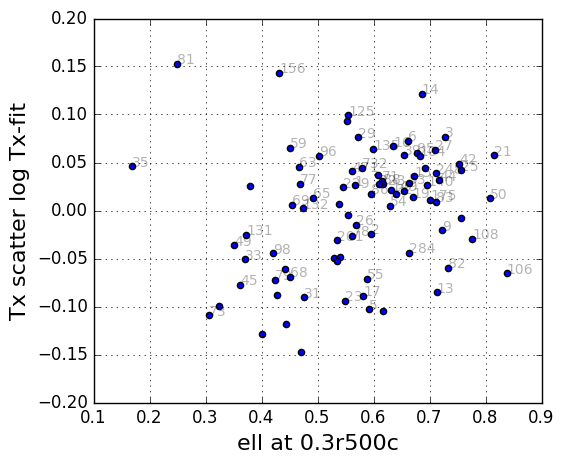

In [63]:
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot500c),np.log10(Tx))
line = slope*np.log10(Mtot500c)+intercept
print r_value,p_value,std_err
fig=plt.figure()
fig.add_axes([0.2, 0.2, 0.7, 0.8])
plt.xlabel('Mtot Msun/h')
plt.ylabel('Tx keV')
plt.scatter(np.log10(Mtot500c),np.log10(Tx))
plt.plot(np.log10(Mtot500c), line)
plt.savefig('Tx_Mtot.png')


plt.show()

plt.scatter(np.log10(Mtot500c),(np.log10(Tx)-line))

plt.xlabel('Mtot Msun/h')
plt.ylabel('Tx scatter')
plt.show()

Gamma=np.array(Gamma)
fig=plt.figure()
fig.add_axes([0.2, 0.2, 0.7, 0.8])
plt.scatter(Gamma,(np.log10(Tx)-line))
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],(np.log10(Tx)-line)[i]),alpha=0.3)
plt.xlabel('ell at '+str(rlist[ir])+'r500c')
plt.xlabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')
plt.ylabel('Tx scatter log Tx-fit')
plt.savefig('Tx_scatter_gamma'+'(a='+str(np.around(a,decimals=2))+'~1).eps')
plt.show()
fig=plt.figure()
fig.add_axes([0.2, 0.2, 0.7, 0.8])

plt.scatter(ell_r500c,np.log10(Tx)-line)
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (ell_r500c[i],(np.log10(Tx)-line)[i]),alpha=0.3)
plt.xlabel('ell at '+str(rlist[ir])+'r500c')
plt.ylabel('Tx scatter log Tx-fit')
plt.grid()
plt.savefig('Tx_scatter_'+str(rlist[ir])+'r500c.eps')
plt.show()

0.976838257154 2.3541487991e-57 0.0393926595504


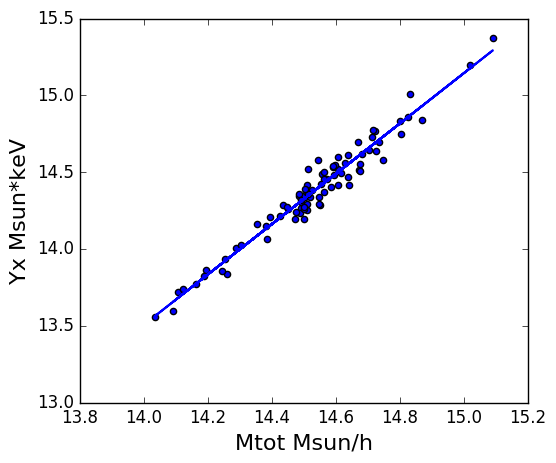

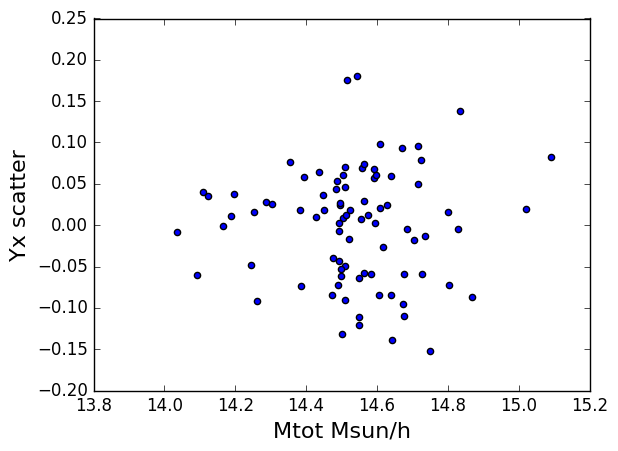

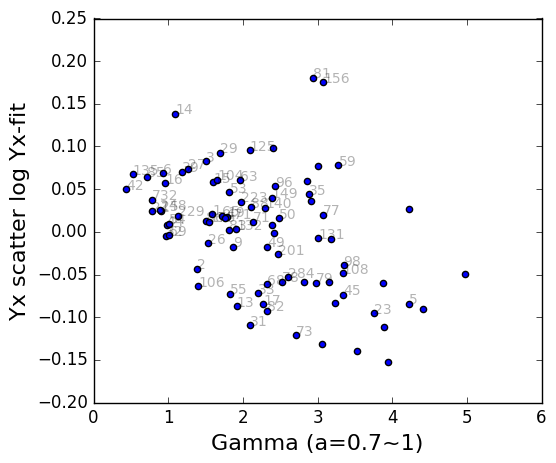

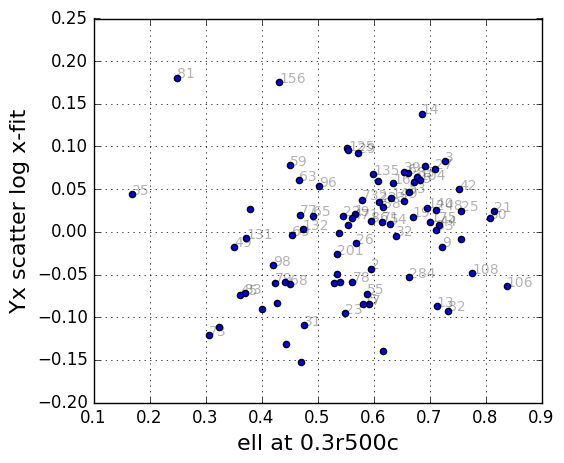

In [58]:
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot500c),np.log10(Yx))
line = slope*np.log10(Mtot500c)+intercept
print r_value,p_value,std_err
fig=plt.figure()
fig.add_axes([0.2, 0.2, 0.7, 0.8])
plt.xlabel('Mtot Msun/h')
plt.ylabel('Yx Msun*keV')
plt.scatter(np.log10(Mtot500c),np.log10(Yx))
plt.plot(np.log10(Mtot500c), line)


plt.show()

plt.scatter(np.log10(Mtot500c),(np.log10(Yx)-line))

plt.xlabel('Mtot Msun/h')
plt.ylabel('Yx scatter')
plt.show()

Gamma=np.array(Gamma)
fig=plt.figure()
fig.add_axes([0.2, 0.2, 0.7, 0.8])
plt.scatter(Gamma,(np.log10(Yx)-line))
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],(np.log10(Yx)-line)[i]),alpha=0.3)
plt.xlabel('ell at '+str(rlist[ir])+'r500c')
plt.xlabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')
plt.ylabel('Yx scatter log Yx-fit')
plt.show()
fig=plt.figure()
fig.add_axes([0.2, 0.2, 0.7, 0.8])

plt.scatter(ell_r500c,np.log10(Yx)-line)
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (ell_r500c[i],(np.log10(Yx)-line)[i]),alpha=0.3)
plt.xlabel('ell at '+str(rlist[ir])+'r500c')
plt.ylabel('Yx scatter log x-fit')
plt.grid()
plt.show()

plot clusters with recent merger


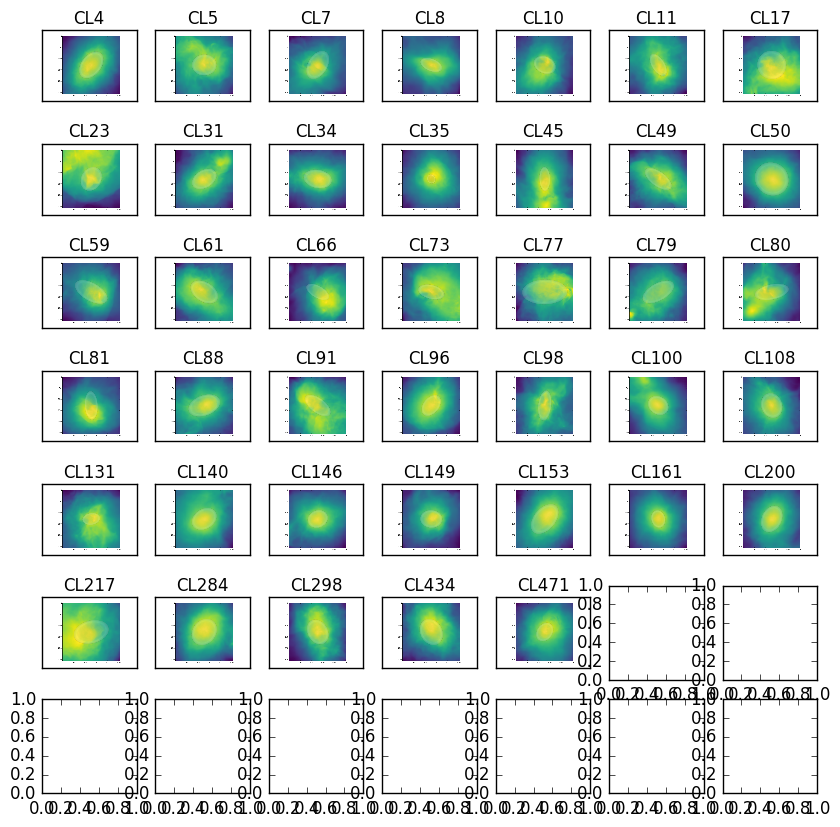

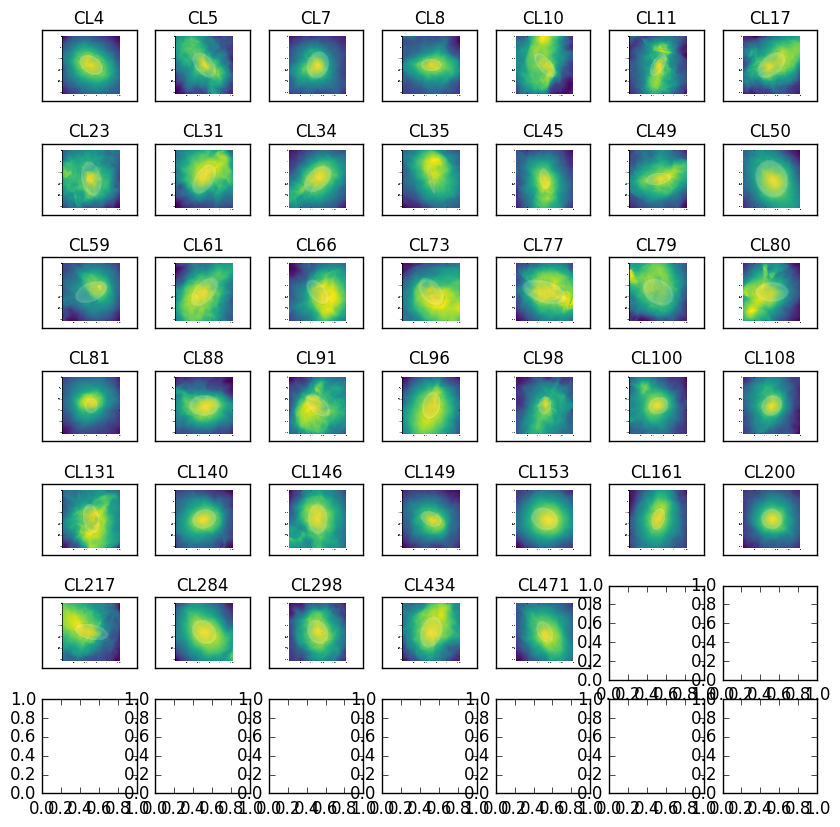

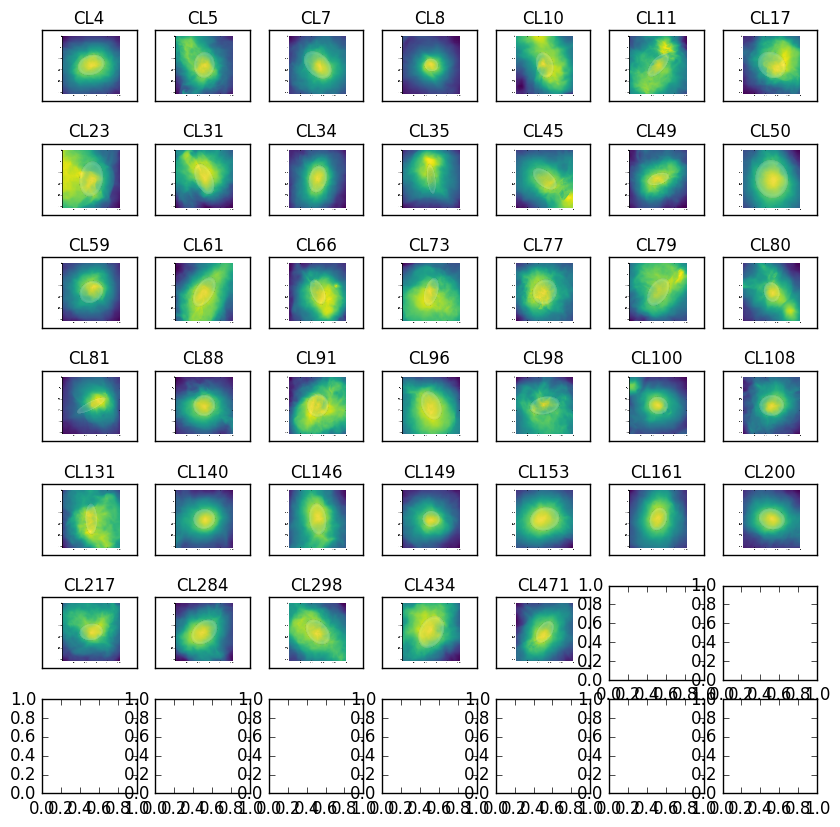

In [59]:
###### plot clusters with recent merger ######
print 'plot clusters with recent merger'
withmerger=merger['z0_parent_id'][(merger['1:5 after a=0.7'])]
nimg=7

fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))
for i,ids in enumerate(withmerger):
    ids=int(ids)
    img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_0.3r500c_ell3D_0.png')
    
    axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
    axarr[i/nimg,i%nimg].imshow(img)
    axarr[i/nimg,i%nimg].set_xticks([])
    axarr[i/nimg,i%nimg].set_yticks([])
plt.show()

fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))


for i,ids in enumerate(withmerger):
    ids=int(ids)
    img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_0.3r500c_ell3D_1.png')
    
    axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
    axarr[i/nimg,i%nimg].imshow(img)
    axarr[i/nimg,i%nimg].set_xticks([])
    axarr[i/nimg,i%nimg].set_yticks([])
plt.show()

fig, axarr = plt.subplots(nimg, nimg,figsize=(10,10))


for i,ids in enumerate(withmerger):
    ids=int(ids)
    img=mpimg.imread('../../../results/figures/CL'+str(ids)+'_r_0.3r500c_ell3D_2.png')
    
    axarr[i/nimg,i%nimg].set_title('CL'+str(ids))
    axarr[i/nimg,i%nimg].imshow(img)
    axarr[i/nimg,i%nimg].set_xticks([])
    axarr[i/nimg,i%nimg].set_yticks([])
plt.show()




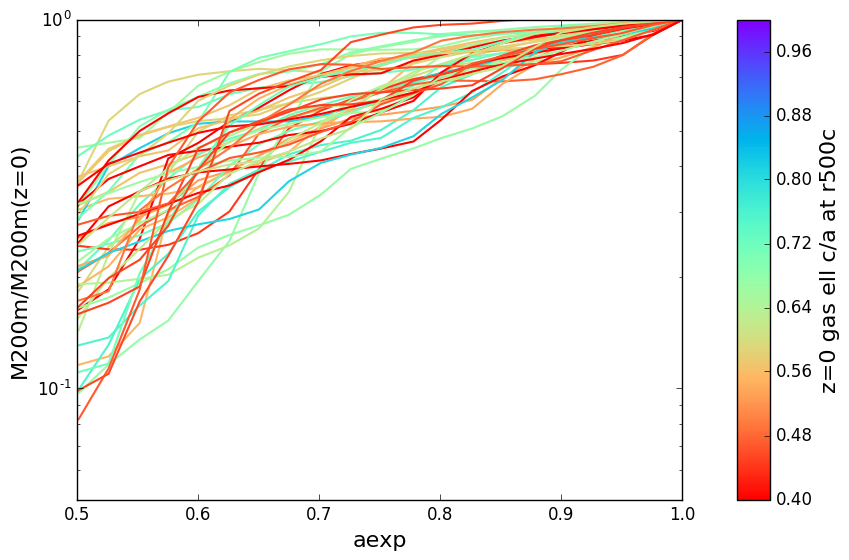

In [167]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
cnorm=colors.Normalize(vmin=0.4,vmax=1.)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(11, 6))
ax = fig.add_axes([0.1, 0.1, 0.55, 0.8])

for i,CLid in enumerate(selectid):
    tmpdata=groupbyz0id.get_group(CLid)
    ell=ell_r500c[i]
    color=scalarmap.to_rgba(ell)
    M0= tmpdata['M_total_200m'].iloc[0]
    ax.plot(tmpdata['aexp'],(tmpdata['M_total_200m'])/M0,c=color)#,label='ell='+str(ell),alpha=0.7)
    plt.yscale('log')
plt.xlim([0.5,1])
plt.xlabel('aexp')
plt.ylabel('M200m/M200m(z=0)')
plt.ylim([5e-2,1e0])
colorbar_ax = fig.add_axes([0.7, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
# fig.colorbar(scalarmap.set_array(), cax=colorbar_ax)
plt.ylabel('z=0 gas ell c/a at r500c')
#plt.savefig('MAH_all.png')
plt.show()

10 11 31 33 35 45 49 59 61 63 65 66 68 69 CLid 69.0
73 77 79 80 81 91 98 131 132 156 217 0.70202020202
25 1


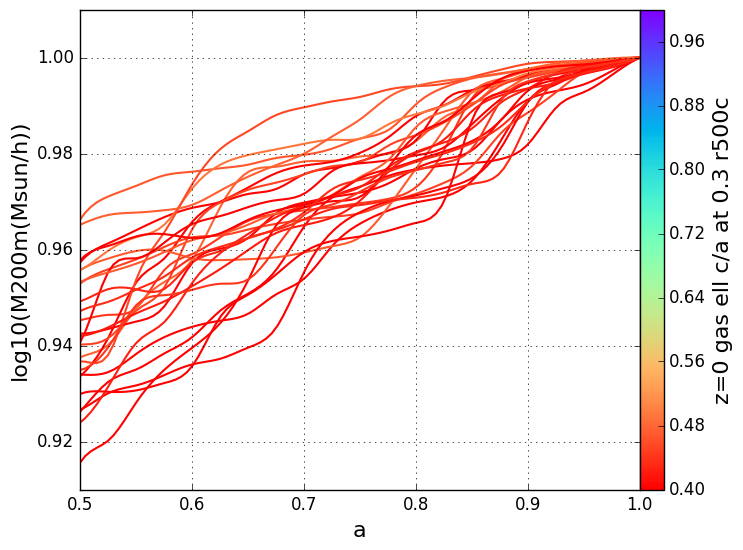

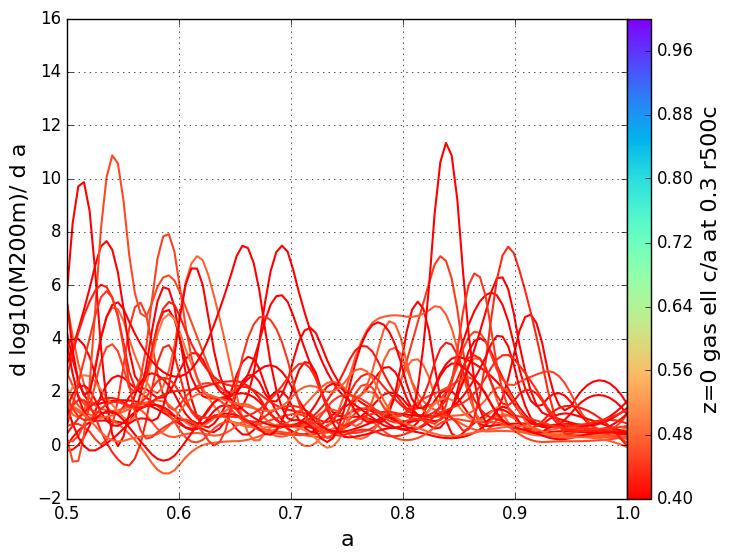

In [168]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from scipy.interpolate import CubicSpline as spl
from scipy import interpolate
cnorm=colors.Normalize(vmin=0.4,vmax=1.)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(8, 6))
fig2=plt.figure(figsize=(8, 6))

ax = fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax2=fig2.add_axes([0.1, 0.1, 0.7, 0.8])

aexp_sample=np.linspace(0.5,1,100)

count=0
subcnt=0
for CLid in allz0id:
    tmpdata=groupbyz0id.get_group(CLid).iloc[0:25]
    i=np.where(allz0id==CLid)[0][0]
    ell=ell_r500c[i]
    
    if ell<0.5:
        print int(CLid),
        count+=1
        color=scalarmap.to_rgba(ell)
        M0= tmpdata['M_total_200m'].iloc[0]
        Mtot=tmpdata['M_total_200m'].as_matrix()
        ae=tmpdata['aexp'].as_matrix()
        spline=spl(ae[::-1],np.log10(Mtot)[::-1])
        deriv=spline.derivative()
        ax.plot(aexp_sample,spline(aexp_sample)/np.log10(M0),c=color)
        ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
        if (deriv(aexp_sample)[40:]<2).all():
            print 'CLid',CLid
            subcnt+=1
print aexp_sample[40]
print count,subcnt
ax.set_xlabel('a')
ax.set_ylabel('log10(M200m(Msun/h))')

colorbar_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])

colorbar_ax2 = fig2.add_axes([0.8, 0.1, 0.03, 0.8])
ax2.set_ylim([-2,16])
ax2.set_ylabel('d log10(M200m)/ d a')

ax2.set_xlabel('a')


ax.grid(True)
ax.set_xlim([0.5,1])


ax2.grid(True)
ax2.set_xlim([0.5,1])


matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
matplotlib.colorbar.ColorbarBase(colorbar_ax2 ,cmap=cmap, norm=cnorm)


colorbar_ax.set_ylabel('z=0 gas ell c/a at '+str(ir*0.1)+' r500c')
colorbar_ax2.set_ylabel('z=0 gas ell c/a at '+str(ir*0.1)+' r500c')


# fig.savefig('ell<0.5_MAH.png')
# fig2.savefig('ell<0.5_MAH_deriv.png')


# fig.colorbar(scalarmap.set_array(), cax=colorbar_ax)
# plt.ylabel('z=0 gas ell c/a at r500c')
plt.show()

3 CLid 3.0
9 13 21 CLid 21.0
25 27 CLid 27.0
42 CLid 42.0
44 CLid 44.0
50 82 83 100 106 108 175 248 0.70202020202
16 5


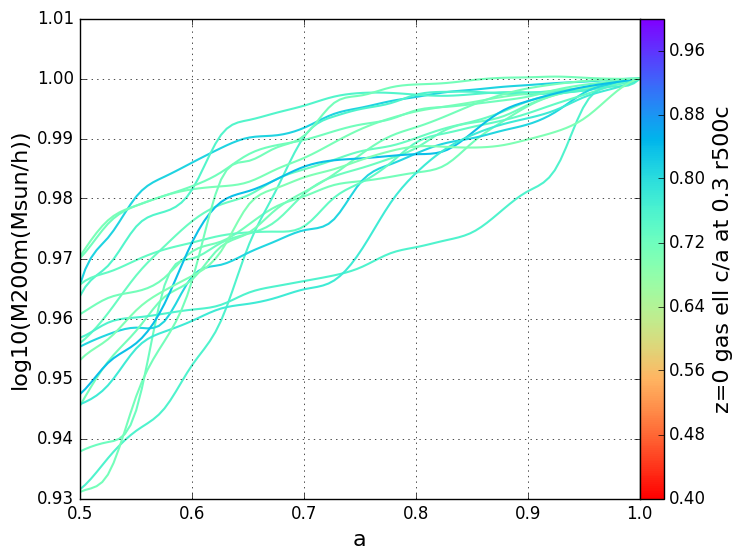

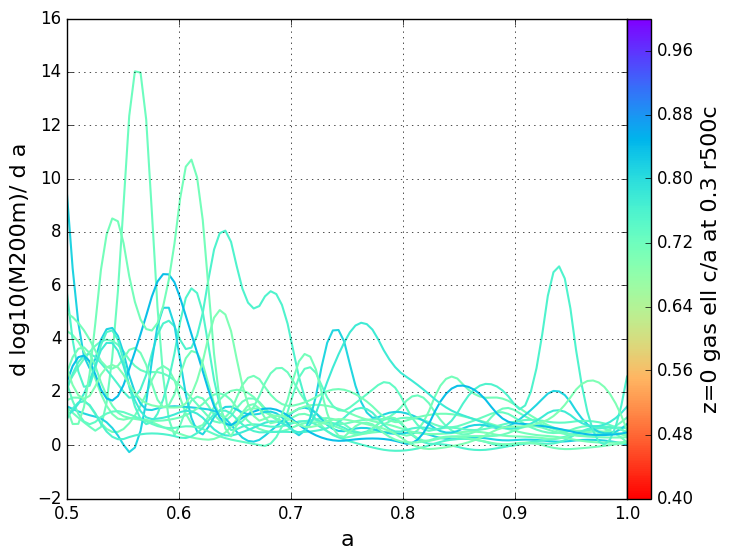

In [169]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from scipy.interpolate import CubicSpline as spl
from scipy import interpolate
cnorm=colors.Normalize(vmin=0.4,vmax=1.)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(8, 6))
fig2=plt.figure(figsize=(8, 6))

ax = fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax2=fig2.add_axes([0.1, 0.1, 0.7, 0.8])

aexp_sample=np.linspace(0.5,1,100)

count=0
subcnt=0
for CLid in allz0id:
    tmpdata=groupbyz0id.get_group(CLid).iloc[0:25]
    i=np.where(allz0id==CLid)[0][0]
    ell=ell_r500c[i]
    
    if ell>0.7:
        print int(CLid),
        count+=1
        color=scalarmap.to_rgba(ell)
        M0= tmpdata['M_total_200m'].iloc[0]
        Mtot=tmpdata['M_total_200m'].as_matrix()
        ae=tmpdata['aexp'].as_matrix()
        spline=spl(ae[::-1],np.log10(Mtot)[::-1])
        deriv=spline.derivative()
        ax.plot(aexp_sample,spline(aexp_sample)/np.log10(M0),c=color)
        ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
        if (deriv(aexp_sample)[40:]<2).all():
            print 'CLid',CLid
            subcnt+=1
print aexp_sample[40]
print count,subcnt
ax.set_xlabel('a')
ax.set_ylabel('log10(M200m(Msun/h))')

colorbar_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])

colorbar_ax2 = fig2.add_axes([0.8, 0.1, 0.03, 0.8])
ax2.set_ylim([-2,16])
ax2.set_ylabel('d log10(M200m)/ d a')

ax2.set_xlabel('a')


ax.grid(True)
ax.set_xlim([0.5,1])


ax2.grid(True)
ax2.set_xlim([0.5,1])


matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
matplotlib.colorbar.ColorbarBase(colorbar_ax2 ,cmap=cmap, norm=cnorm)


colorbar_ax.set_ylabel('z=0 gas ell c/a at '+str(ir*0.1)+' r500c')
colorbar_ax2.set_ylabel('z=0 gas ell c/a at '+str(ir*0.1)+' r500c')


# fig.savefig('ell<0.5_MAH.png')
# fig2.savefig('ell<0.5_MAH_deriv.png')


# fig.colorbar(scalarmap.set_array(), cax=colorbar_ax)
# plt.ylabel('z=0 gas ell c/a at r500c')
plt.show()

In [49]:
cnt=0
ell2d=[]

CLtmp=[]
for direc in 'xyz':
    tmp=[]
    for clid in allz0id:
        with open('../data/spa/CL'+str(int(clid))+'_Lv6_z0.15_expt100ks_Chandra_dir'+direc+'_ell.reg') as f:
            for i, l in enumerate(f):
                if i==5:
                    remember=l
            if i==8: 
                if direc=='x':
                    CLtmp.append(clid)
                frac=remember.split(',')
                aax=float(frac[-3]);bax=float(frac[-2])
                if aax==0:
                    tmp.append(1.)
                else:
                    tmp.append(bax/aax)
    tmp=np.array(tmp)
    if direc=='x':
        ell2d=np.copy(tmp)
    else:
        ell2d=np.minimum(tmp,ell2d)
            
print len(CLtmp),ell2d

85 [ 0.90216001  0.80678751  0.88058519  0.73727488  0.79848075  0.88922412
  0.68740135  1.          0.89194413  0.88470149  0.82203877  0.87216259
  0.89993958  0.80696482  0.8802732   0.88020375  0.64754267  0.85473444
  0.76425972  0.84581989  0.82920968  0.79739466  1.          0.92954203
  0.82753318  0.97600801  0.92283346  0.86175939  0.84769956  0.84454425
  0.92400339  0.62552148  0.89807803  0.74097379  0.69706985  0.86317274
  1.          0.80747084  1.          0.82333852  0.8747963   0.8684869
  0.78275896  0.95937837  0.84663587  0.83985653  0.8893063   0.71984185
  0.85324411  0.68918463  0.88397979  0.72886358  0.89650375  0.8400215
  0.89192114  0.86058946  0.90073657  0.7419229   0.8765837   1.
  0.84357127  0.92540106  0.77377402  0.88552473  0.92665449  0.71419597
  0.90434509  0.80724593  0.70147428  0.83310934  0.73433568  1.
  0.60068828  0.65354324  0.89418048  0.94057979  0.88907515  0.77882183
  0.76611535  0.78990513  0.72886354  0.73689804  1.          0.74

In [54]:
cnt=0
cs2d=[]
CLtmp=[]
for direc in 'xyz':
    tmp=[]
    for clid in allz0id:
        with open('../data/spa/CL'+str(int(clid))+'_Lv6_z0.15_expt100ks_Chandra_dir'+direc+'_cs.reg') as f:
            for i, l in enumerate(f):
                if i==5:
                    remember=l
                    print remember
            if i==8: 
                if direc=='x':
                    CLtmp.append(clid)
                veclen=float(remember.split(',')[2])
                tmp.append(veclen)
    tmp=np.array(tmp)
    if direc=='x':
        cs2d=np.copy(tmp)
    else:
        cs2d=np.maximum(tmp,cs2d)
            
print len(CLtmp),cs2d

# vector(123.736,128.294,1.74839,97.8239) vector=1

# vector(128,133,7.51309,-0.0730191) vector=1

# vector(131,137,4.10185,-61.0788) vector=1

# vector(132,128,14.7293,122.292) vector=1

# vector(121.262,108.629,25.2,69.2739) vector=1

# vector(130,130,5.68036,25.8569) vector=1

# vector(136,130,10.7243,-32.0094) vector=1

# vector(131,134,0,0) vector=1

# vector(136,127,10.1662,-148.96) vector=1

# vector(125,133,3.96185,9.40358) vector=1

# vector(145,137,24.7869,-164.768) vector=1

# vector(134,133,13.3832,-61.7828) vector=1

# vector(134,135,5.62573,-77.4215) vector=1

# vector(130.938,139.661,6.8422,39.2304) vector=1

# vector(129.349,122.667,2.36098,37.917) vector=1

# vector(169.636,155.201,8.52974,-108.087) vector=1

# vector(129,131,9.05637,-34.0328) vector=1

# vector(134.896,129.102,3.9783,34.1576) vector=1

# vector(51,123,34.6377,0.907241) vector=1

# vector(131.722,123.696,3.86785,47.4081) vector=1

# vector(138,133,0,0) vector=1

# vector(130.739,131.827,2.43815,-136.25

0.892066861739 2.28129857582e-30 0.0605437236897


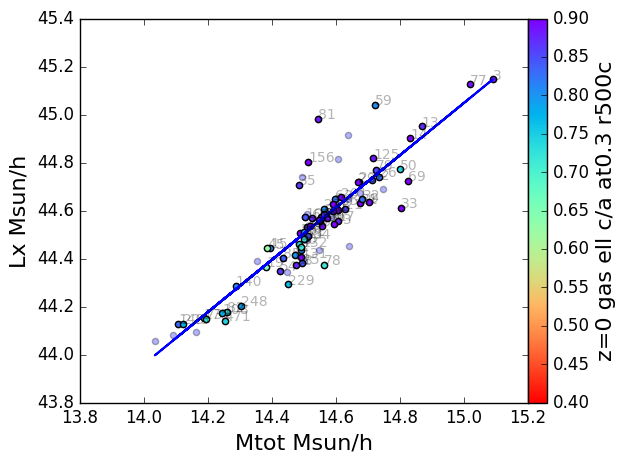

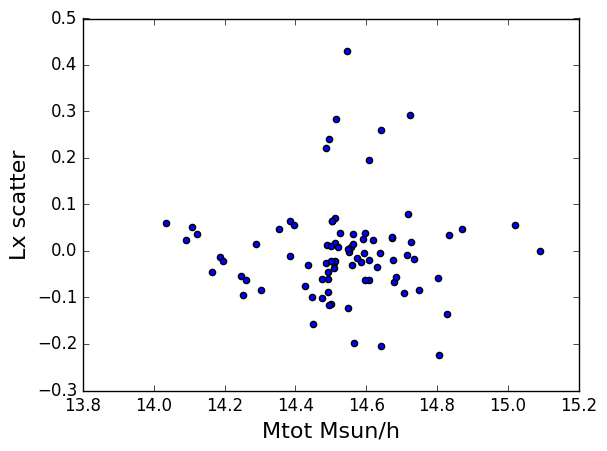

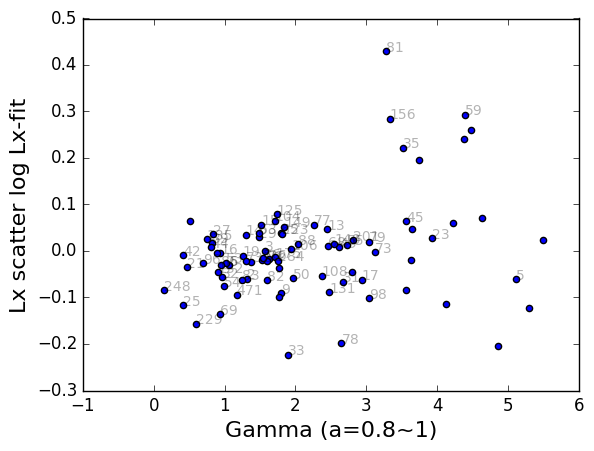

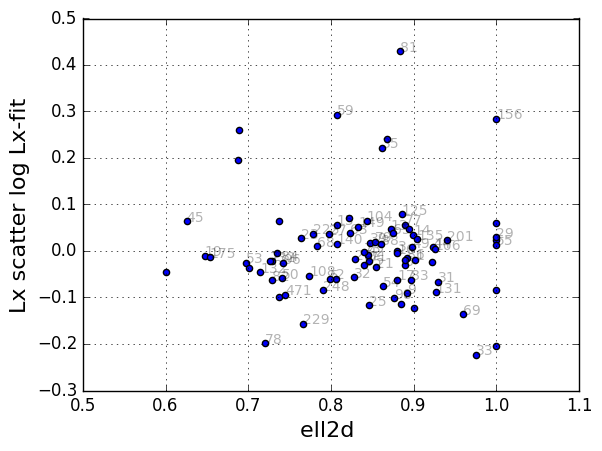

In [57]:
# Generated linear fit
import matplotlib
cnorm=colors.Normalize(vmin=0.4,vmax=.9)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig=plt.figure()
fig.add_axes([0.1, 0.1, 0.7, 0.8])
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(Mtot500c),np.log10(Lx))
line = slope*np.log10(Mtot500c)+intercept
print r_value,p_value,std_err
plt.xlabel('Mtot Msun/h')
plt.ylabel('Lx Msun/h')
plt.scatter(np.log10(Mtot500c),np.log10(Lx),alpha=0.3)
plt.plot(np.log10(Mtot500c), line)


for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        color=scalarmap.to_rgba(ell2d[i])
        txt=str(int(allz0id[i]))
        plt.scatter(np.log10(Mtot500c[i]),np.log10(Lx[i]),c=color)
        plt.annotate(txt, (np.log10(Mtot500c)[i],np.log10(Lx)[i]),alpha=0.3)
colorb_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])
matplotlib.colorbar.ColorbarBase(colorb_ax ,cmap=cmap, norm=cnorm)
colorb_ax.set_ylabel('z=0 gas ell c/a at'+str(rlist[ir])+' r500c')
plt.savefig('Lx_Mtot.png')
plt.show()

plt.scatter(np.log10(Mtot500c),(np.log10(Lx)-line))

plt.xlabel('Mtot Msun/h')
plt.ylabel('Lx scatter')
plt.show()

Gamma=np.array(Gamma)

plt.scatter(Gamma,(np.log10(Lx)-line))
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (Gamma[i],(np.log10(Lx)-line)[i]),alpha=0.3)
plt.xlabel('ell at '+str(rlist[ir])+'r500c')
plt.xlabel('Gamma (a='+str(np.around(a,decimals=2))+'~1)')
plt.ylabel('Lx scatter log Lx-fit')
plt.savefig('Lx_scatter_gamma.png')
plt.show()

plt.scatter(ell2d,np.log10(Lx)-line)
for ids in allz0id:
    i=np.where(allz0id==ids)[0][0]
    if ids in selectid:
        txt=str(int(allz0id[i]))
        plt.annotate(txt, (ell2d[i],(np.log10(Lx)-line)[i]),alpha=0.3)
plt.xlabel('ell2d ')
plt.ylabel('Lx scatter log Lx-fit')
plt.grid()

plt.show()

In [ ]:
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from scipy.interpolate import CubicSpline as spl
from scipy import interpolate
cnorm=colors.Normalize(vmin=0.4,vmax=.9)
cmap=cm.rainbow_r
scalarmap=cm.ScalarMappable(norm=cnorm,cmap=cmap)
fig = plt.figure(figsize=(11, 6))
fig2=plt.figure(figsize=(11, 6))

ax = fig.add_axes([0.1, 0.1, 0.7, 0.8])

ax2=fig2.add_axes([0.1, 0.1, 0.7, 0.8])

aexp_sample=np.linspace(0.5,1,100)

count=0
subcnt=0

similargamma=[]

for CLid in selectid:
    
    tmpdata=groupbyz0id.get_group(CLid).iloc[0:25]
    i=np.where(allz0id==CLid)[0][0]
    ell=ell_r500c[i]
    elongthresh=0.7
    if ell<elongthresh:
        count+=1
        color=scalarmap.to_rgba(ell)
        M0= tmpdata['M_total_200m'].iloc[0]
        Mtot=tmpdata['M_total_200m'].as_matrix()
        ae=tmpdata['aexp'].as_matrix()
        spline=spl(ae[::-1],np.log10(Mtot)[::-1])
        deriv=spline.derivative()
        similargamma.append(spline(aexp_sample[-1])-spline(aexp_sample[40]))
        ax.plot(aexp_sample,spline(aexp_sample)/np.log10(M0),c=color)
        ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
#         if (deriv(aexp_sample)[40:]<2).all():
#             subcnt+=1
#             ax.plot(aexp_sample,spline(aexp_sample),c=color)
#             ax2.plot(aexp_sample,deriv(aexp_sample),c=color)
#             print CLid,spline(aexp_sample[-1])-spline(aexp_sample[0])
#             if ell<0.7:
#                 print 'aah',CLid

print count,subcnt
ax.set_xlabel('a')
ax.set_ylabel('log10(M200m(Msun/h))')


colorbar_ax = fig.add_axes([0.8, 0.1, 0.03, 0.8])

colorbar_ax2 = fig2.add_axes([0.8, 0.1, 0.03, 0.8])


ax2.set_ylim([-2,16])
ax2.set_xlabel('a')
ax2.set_ylabel('d log10(M200m)/ d a')


ax.grid(True)
ax.set_xlim([0.5,1])


ax2.grid(True)
ax2.set_xlim([0.5,1])

matplotlib.colorbar.ColorbarBase(colorbar_ax ,cmap=cmap, norm=cnorm)
matplotlib.colorbar.ColorbarBase(colorbar_ax2 ,cmap=cmap, norm=cnorm)

colorbar_ax.set_ylabel('z=0 gas ell c/a at'+str(rlist[ir])+' r500c')
colorbar_ax2.set_ylabel('z=0 gas ell c/a at'+str(rlist[ir])+' r500c')


fig.savefig(str(rlist[ir])+'_r500c_'+'elong_MAH.png')
fig2.savefig(str(rlist[ir])+'_r500c_'+'elong_MAH_deriv.png')

plt.show()

In [ ]:
print df['halos'][df['halos']['aexp']==1.0005][['r200c','id']]

In [ ]:
df['mergers'][df['mergers']['z0_parent_id']==207]

In [ ]:
print df['halos'].columns

In [ ]:
print df['mergers'].columns
df['mergers'][df['mergers']['z0_parent_id']==26]